In [ ]:
import cv2 # OpenCV is often used for image loading and initial processing
import tensorflow as tf
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

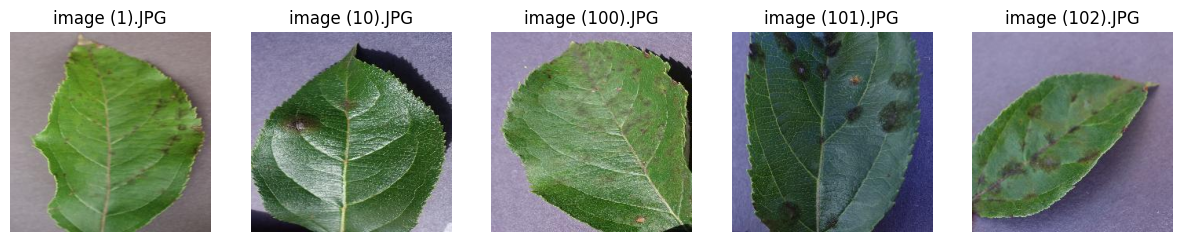

In [ ]:
# Define a function to display a few sample images from the dataset
def display_sample_images(image_folder, num_images=5):
    # Get a list of all image files in the folder
    image_files = os.listdir(image_folder)
    
    # Limit the number of images to display
    sample_images = image_files[:num_images]
    
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(sample_images):
        image_path = os.path.join(image_folder, image_file)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_file)
    plt.show()

#display some sample image
display_sample_images(r'D:\Plant_leaf_disease\Plant_leave_diseases_dataset\Apple___Apple_scab')

Loaded image from D:\Plant_leaf_disease\Plant_leave_diseases_dataset\Apple___Apple_scab\image (8).JPG
Sobel edges shape: (256, 256, 1)
Sobel edges (first 5x5 pixels):
 [[[0.0000000e+00]
  [1.5684724e-02]
  [7.8423023e-03]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[1.5684843e-02]
  [8.4293696e-08]
  [2.7727028e-02]
  [4.3310829e-02]
  [4.3310709e-02]]

 [[5.4896474e-02]
  [7.2089881e-02]
  [9.9198714e-02]
  [1.1867622e-01]
  [1.1867616e-01]]

 [[4.7054172e-02]
  [6.6775262e-02]
  [8.3365157e-02]
  [7.9397820e-02]
  [7.9397544e-02]]

 [[4.7054052e-02]
  [6.6775143e-02]
  [8.3365157e-02]
  [7.9397693e-02]
  [7.9397850e-02]]]


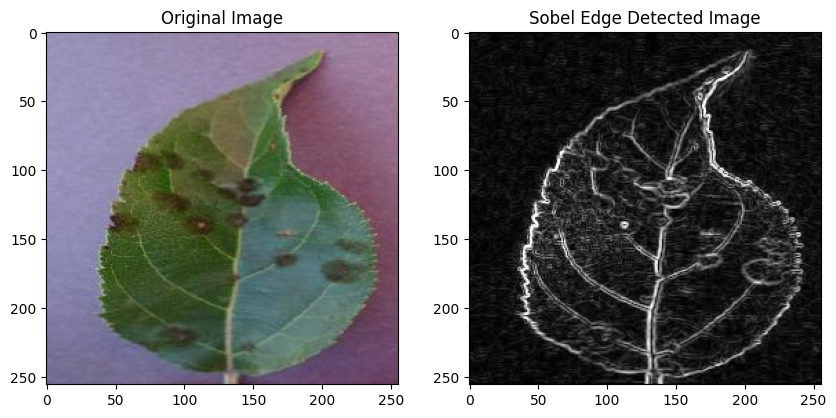


--- Using OpenCV's Canny and converting to TensorFlow tensor ---
OpenCV Canny edges shape: (256, 256)
OpenCV Canny edges (first 5x5 pixels):
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
# import cv2 # OpenCV is often used for image loading and initial processing
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt # Import matplotlib for visualization

# # Assuming you have a 'canny.py' file with the Canny class implementation
# # If not, you would need to implement the Canny algorithm steps (Gaussian blur,
# # gradient calculation, non-maximum suppression, double thresholding, hysteresis)
# # directly using TensorFlow operations or use a library like OpenCV for the Canny step.
# # For this example, we'll assume a 'canny' module is available as per research.
# # If you don't have a 'canny.py' file, you might need to install a library like 'opencv-python'
# # and use cv2.Canny directly, then convert to a TensorFlow tensor.

# # --- Placeholder for Canny class if you don't have a separate file ---
# # In a real scenario, you'd either have this in a 'canny.py' or use tf.image.sobel_edges
# # for basic edge detection, or integrate OpenCV's Canny.
# # For demonstration, let's outline how you'd typically use a Canny implementation.
# # If you need a full Canny implementation in pure TensorFlow, it's more complex
# # and involves multiple steps (Gaussian blur, gradients, non-maximum suppression, hysteresis).
# # A common approach is to use OpenCV for Canny and then convert the output to a TensorFlow tensor.

# # Example of a simplified Canny-like operation using TensorFlow's gradient filters
# # This is NOT a full Canny implementation but shows how CNNs inherently detect edges.
# def apply_sobel_edges_tf(image_tensor):
#     """
#     Applies Sobel edge detection using TensorFlow's image filters.
#     This is a basic edge detection and not a full Canny algorithm.
#     """
#     # Ensure image is float32 for gradient calculations
#     image_tensor = tf.cast(image_tensor, tf.float32) / 255.0 # Normalize to 

#     # Convert to grayscale if it's an RGB image
#     if image_tensor.shape[-1] == 3:
#         image_tensor = tf.image.rgb_to_grayscale(image_tensor)

#     # Expand dimensions to [batch, height, width, channels] for tf.image.sobel_edges
#     image_tensor = tf.expand_dims(image_tensor, axis=0)

#     # Apply Sobel filters
#     sobel_x = tf.image.sobel_edges(image_tensor)[..., 0] # X-direction gradient
#     sobel_y = tf.image.sobel_edges(image_tensor)[..., 1] # Y-direction gradient

#     # Calculate gradient magnitude
#     magnitude = tf.sqrt(tf.square(sobel_x) + tf.square(sobel_y))

#     # Normalize magnitude to  and convert back to uint8 if needed
#     magnitude = tf.clip_by_value(magnitude, 0.0, 1.0)
#     magnitude = tf.squeeze(magnitude, axis=0) # Remove batch dimension
#     return magnitude

# # --- End Placeholder ---

# def preprocess_image_for_edge_detection(image_path, target_size=(256, 256)):
#     """
#     Loads and preprocesses an image for edge detection.
#     Resizes and ensures it's in the correct format (RGB or grayscale).
#     """
#     img = cv2.imread(image_path)
#     if img is None:
#         raise FileNotFoundError(f"Image not found at {image_path}")

#     # Resize the image
#     img = cv2.resize(img, target_size)

#     # Convert BGR to RGB (OpenCV loads as BGR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     # Convert to TensorFlow tensor
#     img_tensor = tf.convert_to_tensor(img, dtype=tf.uint8)
#     return img_tensor

# # --- Example Usage ---
# if __name__ == "__main__":
#     # Create a dummy image for demonstration purposes
#     # In a real scenario, you would load an image from your PlantVillage dataset
#     dummy_image_path = "D:\Plant_leaf_disease\Plant_leave_diseases_dataset\Apple___Apple_scab\image (8).JPG" # Replace with your actual image path

#     # Create a simple dummy image using numpy if no actual image is available
#     # This creates a 256x256 RGB image with a simple square to simulate an edge
#     try:
#         # Attempt to load a real image first
#         original_image_tensor = preprocess_image_for_edge_detection(dummy_image_path)
#         print(f"Loaded image from {dummy_image_path}")
#     except FileNotFoundError:
#         print(f"Dummy image not found at {dummy_image_path}. Creating a synthetic image for demonstration.")
#         synthetic_img = np.zeros((256, 256, 3), dtype=np.uint8)
#         # Draw a white square on a black background to create clear edges
#         synthetic_img[50:200, 50:200, :] = 255
#         original_image_tensor = tf.convert_to_tensor(synthetic_img, dtype=tf.uint8)


#     # --- Option 1: Using a hypothetical 'Canny' class (if you have one) ---
#     # As mentioned in the research, a Canny implementation for TensorFlow exists.
#     # If you have access to the 'canny.py' module, you would use it like this:
#     # from canny import Canny
#     # canny_detector = Canny(sigma=0.8, threshold_min=50, threshold_max=80)
#     # edges_canny = canny_detector(original_image_tensor)
#     # print("Canny edges (if Canny class is available):", edges_canny.shape)

#     # --- Option 2: Using TensorFlow's built-in Sobel operator (simpler, but not full Canny) ---
#     # This is a good starting point to see how gradients (edges) are extracted.
#     edges_sobel = apply_sobel_edges_tf(original_image_tensor)
#     print("Sobel edges shape:", edges_sobel.shape)
#     print("Sobel edges (first 5x5 pixels):\n", edges_sobel.numpy()[:5, :5])

#     # You can visualize the output using matplotlib or save it
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.title("Original Image")
#     plt.imshow(original_image_tensor.numpy())
#     plt.subplot(1, 2, 2)
#     plt.title("Sobel Edge Detected Image")
#     plt.imshow(edges_sobel.numpy(), cmap='gray')
#     plt.show()

#     # --- Option 3: Using OpenCV's Canny for robust edge detection and converting to TF tensor ---
#     # This is often the most practical approach for Canny in a deep learning pipeline
#     # if you don't have a pure TF Canny implementation.
#     print("\n--- Using OpenCV's Canny and converting to TensorFlow tensor ---")
#     img_np = original_image_tensor.numpy() # Convert TF tensor to NumPy array
#     if img_np.shape[-1] == 3:
#         img_np_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
#     else:
#         img_np_gray = img_np # Already grayscale

#     # Apply Canny edge detection using OpenCV
#     # You can tune these thresholds (low_threshold, high_threshold)
#     edges_opencv_canny = cv2.Canny(img_np_gray, 50, 150) #

#     # Convert the OpenCV output (NumPy array) back to a TensorFlow tensor
#     edges_opencv_canny_tf = tf.convert_to_tensor(edges_opencv_canny, dtype=tf.float32) / 255.0
#     print("OpenCV Canny edges shape:", edges_opencv_canny_tf.shape)
#     print("OpenCV Canny edges (first 5x5 pixels):\n", edges_opencv_canny_tf.numpy()[:5, :5])

#     # You can then feed this `edges_opencv_canny_tf` tensor into your TensorFlow model.
#     # For example, you might concatenate it as an additional channel to your original image,
#     # or use it as a separate input if your model architecture supports multi-input.

In [38]:
from tensorflow.keras.utils import image_dataset_from_directory

train_path = r"D:\Plant_leaf_disease\dataset_split\train"

training_set = image_dataset_from_directory(
    train_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 43428 files belonging to 38 classes.


In [ ]:
val_path = r"D:\Plant_leaf_disease\dataset_split\val"
val_set = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10876 files belonging to 38 classes.


In [40]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [19]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[115.   103.   107.  ]
   [111.75  99.75 103.75]
   [110.25  98.25 102.25]
   ...
   [ 72.5   58.5   55.5 ]
   [ 80.5   66.5   65.5 ]
   [ 70.75  56.75  55.75]]

  [[119.25 107.25 111.25]
   [118.75 106.75 110.75]
   [131.75 119.75 123.75]
   ...
   [ 89.    75.    74.25]
   [ 86.    72.    72.  ]
   [ 86.75  72.75  72.75]]

  [[107.    95.    99.  ]
   [109.75  97.75 101.75]
   [105.75  93.75  97.75]
   ...
   [ 70.5   55.75  58.  ]
   [ 74.75  59.75  63.25]
   [ 79.25  64.25  68.25]]

  ...

  [[127.75 108.75 103.  ]
   [109.75 108.    83.  ]
   [ 90.25 106.5   61.25]
   ...
   [101.5   83.5   83.5 ]
   [101.25  83.25  83.25]
   [ 96.5   78.5   78.5 ]]

  [[103.75  85.75  75.25]
   [100.75  97.25  71.25]
   [ 86.   101.5   57.25]
   ...
   [103.    85.    85.  ]
   [ 96.75  78.75  78.75]
   [100.    82.    82.  ]]

  [[ 73.5   53.    44.  ]
   [ 63.5   59.75  35.  ]
   [ 48.75  62.25  22.25]
   ...
   [ 94.75  76.75  76.75]
   [ 99.5   81.5   81.5 ]
   [105.5   87.5   8

In [ ]:
### To Avoid Overfitting
# 1.choose small learning rate like 0.0001
# 2.if underfitting thn increase no of neurons 
# 3.add more conv layers to extract more features from images. 


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [67]:
model = Sequential()

In [68]:
#building convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation ='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [69]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation ='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [70]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation ='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [71]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation ='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [72]:
model.add(Flatten()) #flatting operation

In [73]:
model.add(Dense(units=1024,activation='relu')) #Dense layer

In [74]:
model.add(Dense(units=38,activation='softmax')) #output layer

In [75]:
#compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [77]:
#model training
training_history=model.fit(x=training_set,validation_data=val_set,epochs=10)


Epoch 1/10


1358/1358 [==============================] - 144s 102ms/step - loss: 1.2032 - accuracy: 0.6624 - val_loss: 0.6080 - val_accuracy: 0.8180
Epoch 2/10
1358/1358 [==============================] - 135s 100ms/step - loss: 0.3779 - accuracy: 0.8782 - val_loss: 0.3842 - val_accuracy: 0.8806
Epoch 3/10
1358/1358 [==============================] - 113s 83ms/step - loss: 0.2307 - accuracy: 0.9220 - val_loss: 0.5150 - val_accuracy: 0.8496
Epoch 4/10
1358/1358 [==============================] - 127s 94ms/step - loss: 0.1698 - accuracy: 0.9427 - val_loss: 0.3592 - val_accuracy: 0.9000
Epoch 5/10
1358/1358 [==============================] - 114s 84ms/step - loss: 0.1421 - accuracy: 0.9535 - val_loss: 0.3570 - val_accuracy: 0.9090
Epoch 6/10
1358/1358 [==============================] - 113s 83ms/step - loss: 0.1260 - accuracy: 0.9590 - val_loss: 0.3530 - val_accuracy: 0.9050
Epoch 7/10
1358/1358 [==============================] - 115s 85ms/step - loss: 0.1051 - accuracy: 0.9655 - val_loss: 0.3520 - v

In [ ]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

1358/1358 [==============================] - 32s 23ms/step - loss: 0.0846 - accuracy: 0.9726


In [79]:
print(train_loss,train_acc)

0.08464781194925308 0.9725983142852783


In [80]:
#model evaluation on val
val_loss,val_acc = model.evaluate(val_set)

340/340 [==============================] - 9s 26ms/step - loss: 0.4076 - accuracy: 0.9040


In [81]:
print(val_loss,val_acc)

0.40762656927108765 0.9040088057518005


In [83]:
#saving the model
model.save("trained_model.keras")

In [84]:
training_history.history

{'loss': [1.2031654119491577,
  0.37788817286491394,
  0.2307279407978058,
  0.16983738541603088,
  0.14212293922901154,
  0.12596377730369568,
  0.10506588220596313,
  0.10065124928951263,
  0.09339559823274612,
  0.09841440618038177],
 'accuracy': [0.662360668182373,
  0.8782122135162354,
  0.9219858050346375,
  0.9426867365837097,
  0.9535322785377502,
  0.9589896202087402,
  0.9655291438102722,
  0.9678548574447632,
  0.9703417420387268,
  0.969835102558136],
 'val_loss': [0.6079506278038025,
  0.384186714887619,
  0.5149747133255005,
  0.3591820001602173,
  0.3569839894771576,
  0.3529982268810272,
  0.35197749733924866,
  0.3974418044090271,
  0.36948177218437195,
  0.40762653946876526],
 'val_accuracy': [0.8180397152900696,
  0.8805627226829529,
  0.8495770692825317,
  0.8999632000923157,
  0.9089738726615906,
  0.9050202369689941,
  0.9017102122306824,
  0.9051121473312378,
  0.9128355979919434,
  0.9040088057518005]}

In [85]:
#recording the history in json
import json
with open("train_hist.json","w") as f:
    json.dump(training_history.history,f)
    


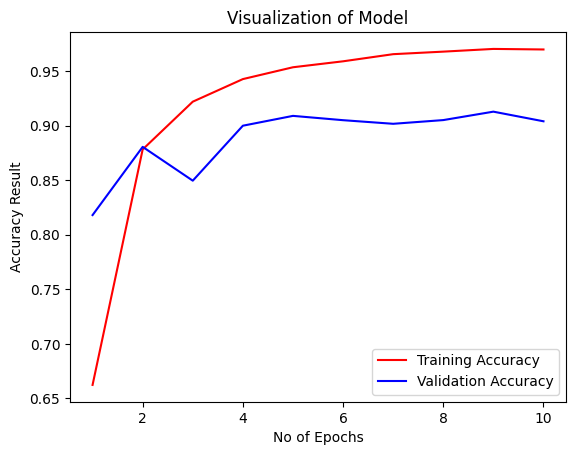

In [90]:
#visualizing our model
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Model")
plt.legend()
plt.show()

In [92]:
class_names = val_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Lea

In [93]:
val_path = r"D:\Plant_leaf_disease\dataset_split\val"
test_set = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, #to match the class
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10876 files belonging to 38 classes.


In [95]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

340/340 [==============================] - 8s 23ms/step


(array([[4.70243990e-01, 1.60050215e-04, 1.24753555e-02, ...,
         1.23417570e-11, 1.08191056e-09, 5.12101417e-10],
        [1.12344109e-01, 6.98863587e-05, 4.39480878e-04, ...,
         1.12747539e-05, 4.87454142e-03, 4.62699281e-05],
        [9.99969125e-01, 1.39763021e-10, 3.41244502e-13, ...,
         6.12649775e-12, 5.44664547e-14, 4.70597797e-11],
        ...,
        [4.82197511e-11, 8.99793528e-15, 9.40650523e-16, ...,
         2.38385311e-10, 4.73621975e-11, 9.99931693e-01],
        [1.32613032e-09, 2.27945093e-10, 2.77001620e-12, ...,
         5.46886925e-10, 5.33601785e-08, 9.79031682e-01],
        [1.79594075e-14, 1.38712256e-19, 4.58061966e-19, ...,
         2.34398607e-16, 3.76763167e-17, 9.99989629e-01]], dtype=float32),
 (10876, 38))

In [96]:
predict_categories = tf.argmax(y_pred,axis=1) #to find max value. axis=1 means col wise 

In [97]:
predict_categories

<tf.Tensor: shape=(10876,), dtype=int64, numpy=array([20,  4,  0, ..., 37, 37, 37], dtype=int64)>

In [98]:
true_catogories = tf.concat([y for x,y in test_set],axis=0) #axis 0 means row wise fashion
true_catogories

<tf.Tensor: shape=(10876, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [99]:
Y_true = tf.argmax(true_catogories,axis=1)
Y_true

<tf.Tensor: shape=(10876,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
print(classification_report(Y_true,predict_categories,target_names=class_names))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.78      0.80      0.79       126
                            Apple___Black_rot       0.96      0.93      0.94       125
                     Apple___Cedar_apple_rust       0.89      0.89      0.89        55
                              Apple___healthy       0.76      0.91      0.83       329
                          Blueberry___healthy       0.87      0.98      0.92       301
                      Cherry___Powdery_mildew       0.91      0.97      0.94       211
                             Cherry___healthy       0.94      0.91      0.92       171
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.68      0.73       103
                           Corn___Common_rust       0.96      1.00      0.98       239
                  Corn___Northern_Leaf_Blight       0.84      0.81      0.83       197
                               Corn___heal

In [ ]:
con_mat=confusion_matrix(Y_true,predict_categories)
con_mat.shape 

(38, 38)

In [ ]:
#visualizing the matrix


In [ ]:
train_dir = '../dataset_split/train'  # Path to your train folder
val_dir = '../dataset_split/val'      # Path to your val folder

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_generators(train_dir, val_dir, target_size=(224, 224), batch_size=32):
    # Image augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Rescale only for validation
    val_datagen = ImageDataGenerator(rescale=1./255)

    # Training data generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Validation data generator
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, val_generator


In [8]:
# Get the training and validation generators
train_generator, val_generator = create_generators(train_dir, val_dir)

# Get a batch of images and labels from the training generator
x_batch, y_batch = next(train_generator)

# Check the shapes
print(f"Image batch shape: {x_batch.shape}")
print(f"Label batch shape: {y_batch.shape}")


Found 44342 images belonging to 39 classes.
Found 11105 images belonging to 39 classes.


: 

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the custom model on top of the pre-trained ResNet50 model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(39, activation='softmax')  # 39 classes for your plant disease dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 39)                79911     
                                                                 
Total params: 23,667,623
Trainable params: 79,911
Non-trainable params: 23,587,712
_________________________________________________________________


In [3]:
# Get the training and validation generators
train_generator, val_generator = create_generators(train_dir, val_dir)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


NameError: name 'create_generators' is not defined